# Isomorphism - How to find if two graphs are similar?

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## What is isomorphism? Why is it interesting?

As unlabeled graphs can have multiple spatial representations, two graphs are isomorphic if they have the same number of edges, vertices, and same edges connectivity. Let's see an example of two isomorphic graphs,

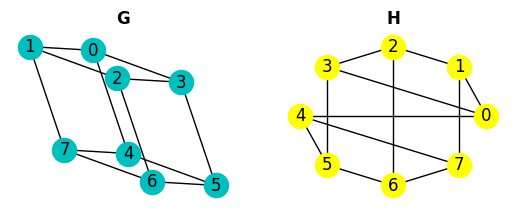

In [2]:
plt.subplot(221)
G = nx.cubical_graph()
nx.draw_spectral(G, with_labels=True, node_color="c")
plt.title("G", fontweight="bold")
H = nx.cubical_graph()
plt.subplot(222)
nx.draw_circular(H, with_labels=True, node_color="yellow")
plt.title("H", fontweight="bold")

plt.show()

The spatial representations of these two graphs are very different yet
they are the same graphs!

### Formal definition

G and H are isomorphic if we can establish a bijection between the vertex sets of G and H. 

$$ {\displaystyle f\colon N(G)\to N(H)} $$

such as if 

$v$  and $ w $ are  adjacent  in G $\iff$ $f(v)$ and $f(w)$ are adjacent in H 


To formally prove that 2 graphs are isomorphic we need to find the bijection between the vertex set. For the previous example that would be: 

$$f(i) = i+1 \hspace{0.5cm} \forall i \in [0, 7]$$


For small examples, isomorphism may seem easy. But it isn't a simple problem. For two graphs G and H of n nodes, there are n! possible bijection functions.
Checking every combination is not a feasible option for bigger graphs. 
In fact, isomorphism is part of the problems known as NP. This means that we don't know any algorithm that runs in polynomial time.


### Applications 

There are a lot of applications of the graph isomorphism problem.

- Image recognition: Images can be translated to graphs and by finding (sub)isomorphisms we can compare if two images are similar.

- Verification of equivalence of different representations of the design of an electronic circuit and communication networks. 

- Identification of chemical compounds and proteins.

- Algorithms for fingerprint, facial and retina matching.

- Clustering Algorithms on social networks.

## Isomorphism Algorithms
**Naive Approach**


There are some initial properties that we can check to decide whether it's possible to have an isomorphism
- G and H must have the same number of nodes and edges 
- The degree sequence for G and H must be the same

These are necessary conditions but don't guarantee that two graphs are isomorphic. Let's see a small example:

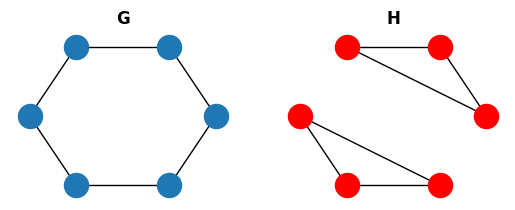

In [3]:
plt.subplot(221)
G = nx.cycle_graph(6)
nx.draw_circular(G)
plt.title("G", fontweight="bold")
plt.subplot(222)
H = nx.union(nx.cycle_graph(3), nx.cycle_graph(3), rename=("s", "d"))
nx.draw_circular(H, node_color="r")
plt.title("H", fontweight="bold")
plt.show()

We can use the function `nx.faster_could_be_isomorphic()` that returns True if G and H have the same degree secuence.

In [4]:
nx.faster_could_be_isomorphic(G, H)

True

These graphs are clearly not isomorphic but they have the same degree secuence.

Another property we can check for is: 
- The same number of cycles of a particular length, for example, triangles. 

We can use the function `nx.fast_could_be_isomorphic()` to check if the graphs have the same degree and triangle sequence. The triangle sequence contains the number of triangles each node is part of.

In [5]:
nx.fast_could_be_isomorphic(G, H)

False

This new property allows us to detect that the graphs from the previous example were not isomorphic. 

We can go one step further and check: 
- The same number of maximal cliques. 

We can use the function `nx.could_be_isomorphic()` to check if the graphs have the same degree, triangle, and clique sequence.
The clique sequence contains for each node the number of the maximal clique involving that node.

In [6]:
nx.could_be_isomorphic(G, H)

False

Again we can detect that G and H are not isomorphic. But these conditions are not enough to say that two graphs are isomorphic. Let's look at the following example:

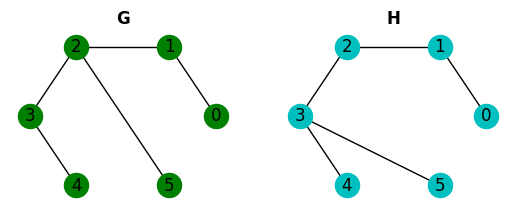

In [7]:
plt.subplot(221)
G = nx.path_graph(5)
G.add_edge(2, 5)
nx.draw_circular(G, with_labels=True, node_color="g")
plt.title("G", fontweight="bold")

plt.subplot(222)
H = nx.path_graph(5)
H.add_edge(3, 5)
nx.draw_circular(H, with_labels=True, node_color="c")
plt.title("H", fontweight="bold")
plt.show()

In [8]:
nx.could_be_isomorphic(G, H)

True

These graphs meet all the necessary conditions but they're not isomorphic.


## Some classes of graphs with solution in polynomial time
- Trees
- Planar graphs(In fact, planar graph isomorphism is O(log(n)))
- Interval graphs
- Permutation graphs
- Circulant graphs
- Bounded-parameter graphs
    - Graphs of bounded treewidth
    - Graphs of bounded genus
    - Graphs of bounded degree
    - Graphs with bounded eigenvalue multiplicity
    - k-Contractible graphs (a generalization of bounded degree and bounded genus)

Let's see an example, we can use the function *tree_isomorphism()* from the isomorphism module to check if two trees are isomorphic in $O(n*log(n))$. This function uses a D&C approach to match the trees once it has found the root of each tree and returns a list with the node matching. 

So let's use it to check that a 2-ary tree of $2^4 - 1$ nodes is a balanced binary tree of height 3.

In [9]:
t1 = nx.balanced_tree(2, 3)
t2 = nx.full_rary_tree(2, 15)

from networkx.algorithms import isomorphism as iso

print("Node matching")
iso.tree_isomorphism(t1, t2)

Node matching


[(0, 0),
 (1, 1),
 (3, 3),
 (7, 7),
 (8, 8),
 (4, 4),
 (9, 9),
 (10, 10),
 (2, 2),
 (5, 5),
 (11, 11),
 (12, 12),
 (6, 6),
 (13, 13),
 (14, 14)]

## Advanced Algorithms

<!-- #region -->
### VF2

This algorithm is used to solve graph isomorphism and sub-graph isomorphism as well. 

VF2 is a recursive algorithm where in each step we extend the current matching function to cover more nodes of both graphs until there are no more nodes to match. This is not a brute-force approach because there are some feasibility rules to avoid exploring the whole recursion tree. 


Formally, We have a function $ M: s \rightarrow N(G) \times N(H) $. $M$ is a matching function between the subsets of nodes from $G$ and $H$ at the current state $s$. We start with an initial state $s_0$ with $M(s_0) = \emptyset$. In each step we consider a set of nodes to expand the current state $s$ to the following state $s'$. In this new state $M(s') = M(s) \cup {(g, h)} , g\in N(G), h\in N(H)$. The consistency condition is that the partial graphs $G$ and $H$ associated with $M(s)$ are isomorphic. There are two types of feasibility checks: 
- syntactic (graph structure): consist of checking the consistency condition and also the k-look-ahead rules, for checking in advance if a consistent state $s$ has no consistent successors after k steps.
- semantic(attributes). 

Pseudocode:
<!-- #endregion -->

**Match(s):**
    
    Input: Intermediate state
    
    Output: The mapping between the 2 graphs
    
    IF M(s) covers all nodes of H THEN:
        RETURN M(s)
    ELSE:
        Compute P = {(g, h)...} the set of candidates for inclusion in M(s). 
        FOR each p in P:
            IF the feasibility rules succeed for the inclusion of p in M(s) THEN:
                Compute the state of s'
                MATCH(s')
           ENDIF
       ENDFOR
       Restore data structures
    ENDIF


Let's use VF2 to check that the graphs from the previous example:

In [10]:
G = nx.path_graph(5)
G.add_edge(2, 5)

H = nx.path_graph(5)
H.add_edge(3, 5)

nx.is_isomorphic(G, H)

False

**Time Complexity**
- Best Case $\in \theta(n²)$ if only $n$ states are explored, for example, if each node is explored once.   
- Worst Case $\in \theta(n!n)$ if all the possible matchings have to be completely explored.


## State of the art 
- VF2++ and VF2 Plus. They include some optimizations over the algorithm VF2. 
- There are some new algorithms: QuickSI, GraphQL, TurboISO, BoostISO, CFL-Match, VF3, CECI, and DAF.


### References
- Gross J., Yellen J., Anderson M. (2018). *Graph Theory and Its applications* (3rd edition). CRC Press. 
- Somkunwar R., Moreshwar Vaze V. *A Comparative Study of Graph Isomorphism Applications*. International Journal of Computer Applications (0975 – 8887). Volume 162 – No 7, (March 2017) <https://www.ijcaonline.org/archives/volume162/number7/somkunwar-2017-ijca-913414.pdf>
- L. P. Cordella, P. Foggia, C. Sansone, M. Vento, “An Improved Algorithm for Matching Large Graphs”, IEEE Transactions on Pattern Analysis and Machine Intelligence ( Volume: 26, Issue: 10, October 2004) <https://ieeexplore.ieee.org/document/1323804>
- <https://en.wikipedia.org/wiki/Graph_isomorphism_problem>